In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
headers = ['time [s]','L(E>0.1keV)', 'L(E>0.2keV)', 'L(E>0.3keV)', 'L(E>0.5keV)', 'L(E>1keV)', 'L(E>2keV)', 'L(E>5keV)', 'L(E>10keV)']

df = pd.read_csv('/home/visitor_ap4/code/project/scripts/xray-luminosity/xray-lum-wr140-hydro-n128.txt', sep=' ', names=headers, index_col=False)
df.head()

,time [s],L(E>0.1keV),L(E>0.2keV),L(E>0.3keV),L(E>0.5keV),L(E>1keV),L(E>2keV),L(E>5keV),L(E>10keV)
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,43.751887,2.459287e+29,5.170404e+28,1.474571e+28,2.714581e+27,8.162375e+24,2.137996e+24,8.301101e+23,1.538035e+23
2,58557.325908,8.651936e+32,2.281432e+32,1.007817e+32,4.549766e+31,1.322403e+30,1.807138e+28,3.317044e+26,8.068704e+25
3,164966.241092,1.831880e+32,3.164214e+31,1.240700e+31,4.911129e+30,1.535999e+29,1.330971e+28,3.064009e+27,8.426625e+26
4,267309.553723,1.429654e+32,2.417011e+31,8.863559e+30,3.213965e+30,1.714733e+29,6.318731e+28,3.709674e+28,2.025698e+28


In [28]:
df['L(2keV < E < 10keV)'] = df['L(E>2keV)'] - df['L(E>10keV)']
df['time [s]'] = df['time [s]'] / (24*60*60)
df.rename(columns={'time [s]': 'time [d]'}, inplace=True)
df.head()

,time [d],L(E>0.1keV),L(E>0.2keV),L(E>0.3keV),L(E>0.5keV),L(E>1keV),L(E>2keV),L(E>5keV),L(E>10keV),L(2keV < E < 10keV)
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000506,2.459287e+29,5.170404e+28,1.474571e+28,2.714581e+27,8.162375e+24,2.137996e+24,8.301101e+23,1.538035e+23,1.984192e+24
2,0.677747,8.651936e+32,2.281432e+32,1.007817e+32,4.549766e+31,1.322403e+30,1.807138e+28,3.317044e+26,8.068704e+25,1.799069e+28
3,1.909331,1.831880e+32,3.164214e+31,1.240700e+31,4.911129e+30,1.535999e+29,1.330971e+28,3.064009e+27,8.426625e+26,1.246705e+28
4,3.093861,1.429654e+32,2.417011e+31,8.863559e+30,3.213965e+30,1.714733e+29,6.318731e+28,3.709674e+28,2.025698e+28,4.293034e+28


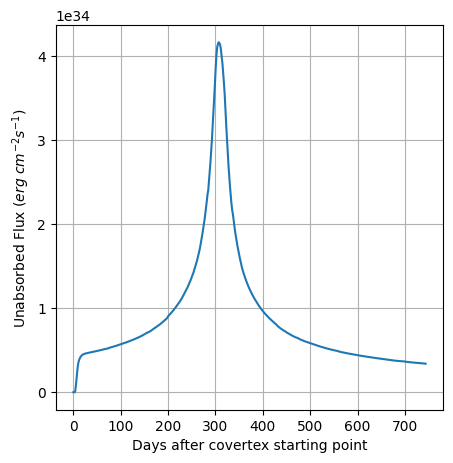

In [29]:
fig, ax = plt.subplots(figsize=(5,5))

daysec = 24 * 60 * 60 

ax.plot(df['time [d]'], df['L(2keV < E < 10keV)'])
ax.set_xlabel("Days after covertex starting point")
ax.set_ylabel('Unabsorbed Flux ($erg$ $cm^{-2}$$s^{-1}$)')
ax.grid()

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

from astropy import units as u

In [5]:
l01 = []
l02 = []
l03 = []
l05 = []
l1 = []
l2 = []
l5 = []
l10 = []
sim_time = []

# Read a line of numbers out of a text file:
with open("/home/visitor_ap4/code/project/scripts/xray-luminosity/xray-lum-wr140-hydro-n128.txt") as x:
    for line in x:
        data = line.split()
        l01.append(float(data[0]))
        l02.append(float(data[1]))
        l03.append(float(data[2]))
        l05.append(float(data[3]))
        l1.append(float(data[4]))
        l2.append(float(data[5]))
        l5.append(float(data[6]))
        l10.append(float(data[7]))
        sim_time.append(float(data[8]))


l01 = np.array(l01)
l02 = np.array(l02)
l03 = np.array(l03)
l05 = np.array(l05)
l1 = np.array(l1)
l2 = np.array(l2)
l5 = np.array(l5)
l10 = np.array(l10)
sim_time = np.array(sim_time) / 31536000 / 1e6

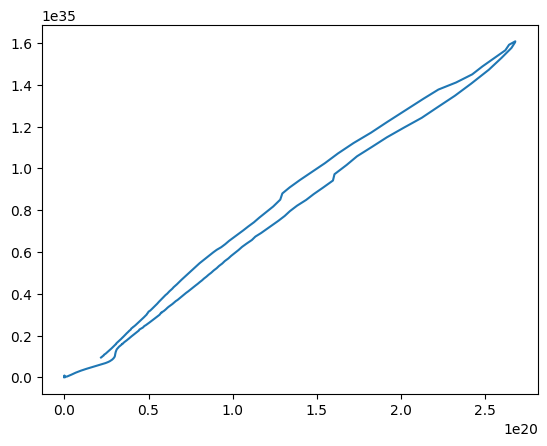

In [13]:
plt.plot(sim_time, l02-l10)